In [44]:
import pandas as pd
import numpy as np
import os

In [45]:
train_df = pd.read_csv(os.path.join('data', "train.csv"))
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [46]:
def substitute_sex(x: str) -> int:
    return int(x != "male")


def stone_the_adulters(x: int) -> str: # denormalizing function
    return "male" if x == 0 else "female"

""" def substitute_embarked(x: str) -> int:
    if x == "S":
        return 0
    elif x == "C":
        return 1
    else:
        return 2 """

""" def disembarque(x: int) -> str:
    if x == 0:
        return "S"
    elif x == 1:
        return "C"
    else:
        return "Q" """

' def disembarque(x: int) -> str:\n    if x == 0:\n        return "S"\n    elif x == 1:\n        return "C"\n    else:\n        return "Q" '

In [47]:
train_df = train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
train_df = train_df.dropna()


train_df['Sex'] = train_df['Sex'].apply(substitute_sex)
#train_df['Embarked'] = train_df['Embarked'].apply(substitute_embarked)


mean = train_df['Age'].mean()
std = train_df['Age'].std()
train_df['Age'] = (train_df['Age'] - mean) / std

In [48]:
train_df['bias'] = [1 for x in range((train_df.shape[0]))]

In [49]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,bias
0,0,3,0,-0.530005,1,0,1
1,1,1,1,0.571430,1,0,1
2,1,3,1,-0.254646,0,0,1
3,1,1,1,0.364911,1,0,1
4,0,3,0,0.364911,0,0,1
...,...,...,...,...,...,...,...
885,0,3,1,0.640270,0,5,1
886,0,2,0,-0.185807,0,0,1
887,1,1,1,-0.736524,0,0,1
889,1,1,0,-0.254646,0,0,1


In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.15, random_state=69)

In [77]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((606, 6), (108, 6), (606,), (108,))

In [78]:
def MSELoss(y_true: np.ndarray, y_pred: np.ndarray) -> np.float32:
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    return (1/len(y_true)) * np.sum((y_pred - y_true) ** 2)

def accuracy_with_thresholding(y_true: np.ndarray, y_pred: np.ndarray, threshold = 0.5):
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    return np.sum(
        y_true == (y_pred > threshold).astype(np.int32)
    ) / len(y_true)
    
def precision(y_true: np.ndarray, y_pred: np.ndarray, threshold=0.5) -> float:
    y_pred_bin = (y_pred > threshold).astype(np.int32)
    true_positives = np.sum((y_pred_bin == 1) & (y_true == 1))
    predicted_positives = np.sum(y_pred_bin == 1)
    if predicted_positives == 0:
        return 0.0
    return true_positives / predicted_positives

def recall(y_true: np.ndarray, y_pred: np.ndarray, threshold=0.5) -> float:
    y_pred_bin = (y_pred > threshold).astype(np.int32)
    true_positives = np.sum((y_pred_bin == 1) & (y_true == 1))
    actual_positives = np.sum(y_true == 1)
    if actual_positives == 0:
        return 0.0
    return true_positives / actual_positives

def f1_score(y_true: np.ndarray, y_pred: np.ndarray, threshold=0.5) -> float:
    p = precision(y_true, y_pred, threshold)
    r = recall(y_true, y_pred, threshold)
    if p + r == 0:
        return 0.0
    return 2 * (p * r) / (p + r)
 

def sigmoid(z):
    return 1/(1 + np.exp(-z))


# Full batch Gradient Descent

In [89]:
np.random.seed(69)
W = np.random.rand(6).reshape(6,1)
learning_rate = 0.000005


TypeError: GridSearchCV.__init__() missing 2 required positional arguments: 'estimator' and 'param_grid'

In [104]:
for learning_rate in [1/(10**x) for x in range(1, 10)]:
    print(learning_rate)
    

0.1
0.01
0.001
0.0001
1e-05
1e-06
1e-07
1e-08
1e-09


# Hyperparameter Tuning

In [121]:
learning_rate_results = []
for learning_rate in [1/(10**x) for x in range(1, 10)]:
    W = np.random.rand(6).reshape(6,1)
    epochs = 10000
    for epoch in range(epochs):
        
        y_pred = sigmoid(np.matmul(X_train, W))
        train_loss = MSELoss(y_train, y_pred)
        W = W - learning_rate * np.matmul(X_train.T, (y_pred - y_train.reshape(-1,1)) * (y_pred * (1-y_pred)))
        
        y_pred_val = sigmoid(np.matmul(X_test, W))
        validation_loss = MSELoss(y_test, y_pred_val)
        validation_accuracy = accuracy_with_thresholding(y_test, y_pred_val)
        val_precision = precision(y_test, y_pred_val)
        val_recall = recall(y_test, y_pred_val)
        f1 = f1_score(y_test, y_pred_val)
    learning_rate_results.append({
        'learning_rate': learning_rate,
        'train_loss': train_loss,
        'validation_loss': validation_loss,
        'validation_accuracy': validation_accuracy
    })

In [122]:
print(learning_rate_results)
results_df = pd.DataFrame(learning_rate_results, columns=['learning_rate', 'train_loss', 'validation_loss', 'validation_accuracy'])
results_df

[{'learning_rate': 0.1, 'train_loss': 0.1669130500725618, 'validation_loss': 0.16523529668542605, 'validation_accuracy': 0.7777777777777778}, {'learning_rate': 0.01, 'train_loss': 0.14255229843172543, 'validation_loss': 0.1255399883043819, 'validation_accuracy': 0.8055555555555556}, {'learning_rate': 0.001, 'train_loss': 0.14255231812661837, 'validation_loss': 0.1255438697239405, 'validation_accuracy': 0.8055555555555556}, {'learning_rate': 0.0001, 'train_loss': 0.14324526833313717, 'validation_loss': 0.1272906151902408, 'validation_accuracy': 0.8055555555555556}, {'learning_rate': 1e-05, 'train_loss': 0.16601847807764095, 'validation_loss': 0.16171647948933615, 'validation_accuracy': 0.7870370370370371}, {'learning_rate': 1e-06, 'train_loss': 0.22778928012128866, 'validation_loss': 0.2307668656774978, 'validation_accuracy': 0.6111111111111112}, {'learning_rate': 1e-07, 'train_loss': 0.4588072347169639, 'validation_loss': 0.40255447053164406, 'validation_accuracy': 0.4722222222222222},

,learning_rate,train_loss,validation_loss,validation_accuracy
0,1.000000e-01,0.166913,0.165235,0.777778
1,1.000000e-02,0.142552,0.125540,0.805556
2,1.000000e-03,0.142552,0.125544,0.805556
3,1.000000e-04,0.143245,0.127291,0.805556
4,1.000000e-05,0.166018,0.161716,0.787037
5,1.000000e-06,0.227789,0.230767,0.611111
6,1.000000e-07,0.458807,0.402554,0.472222
7,1.000000e-08,0.542847,0.471954,0.472222
8,1.000000e-09,0.479810,0.417807,0.472222


<Axes: title={'center': 'Validation Accuracy vs Learning Rate'}, xlabel='learning_rate'>

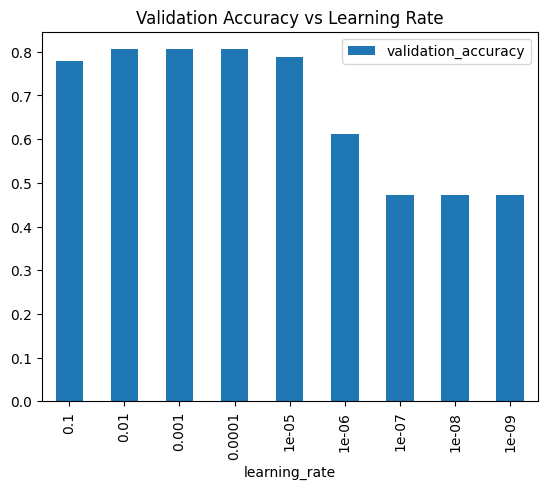

In [ ]:
results_df.plot.bar(x='learning_rate', y='validation_accuracy', title='Validation Accuracy vs Learning Rate')

In [124]:
best_learning_rate = results_df.loc[results_df['validation_accuracy'].idxmax()]['learning_rate']
best_learning_rate

0.01

In [126]:
learning_rate = best_learning_rate
W = np.random.rand(6).reshape(6,1)
epochs = 10000
for epoch in range(epochs):
    
    y_pred = sigmoid(np.matmul(X_train, W))
    train_loss = MSELoss(y_train, y_pred)
    W = W - learning_rate * np.matmul(X_train.T, (y_pred - y_train.reshape(-1,1)) * (y_pred * (1-y_pred)))
    
    y_pred_val = sigmoid(np.matmul(X_test, W))
    validation_loss = MSELoss(y_test, y_pred_val)
    validation_accuracy = accuracy_with_thresholding(y_test, y_pred_val)
    val_precision = precision(y_test, y_pred_val)
    val_recall = recall(y_test, y_pred_val)
    f1 = f1_score(y_test, y_pred_val)
    
    if (epoch + 1 ) % 100 == 0:
        print(f"Accuracy: {validation_accuracy}, Training Loss: {train_loss}, Validation Loss: {validation_loss}, Precision: {val_precision}, Recall: {val_recall}, F1 Score: {f1}")
    
    

Accuracy: 0.8055555555555556, Training Loss: 0.1435652744378462, Validation Loss: 0.12780253323994112, Precision: 51.0, Recall: 48.0, F1 Score: 49.45454545454545
Accuracy: 0.8055555555555556, Training Loss: 0.14274188316957984, Validation Loss: 0.1261948744239586, Precision: 51.0, Recall: 48.0, F1 Score: 49.45454545454545
Accuracy: 0.8148148148148148, Training Loss: 0.1426013984743416, Validation Loss: 0.12580667746403285, Precision: 51.0, Recall: 49.0, F1 Score: 49.98
Accuracy: 0.8055555555555556, Training Loss: 0.14256690103523859, Validation Loss: 0.1256672133518186, Precision: 51.0, Recall: 50.0, F1 Score: 50.495049504950494
Accuracy: 0.8055555555555556, Training Loss: 0.14255694614404543, Validation Loss: 0.12560621194018157, Precision: 51.0, Recall: 50.0, F1 Score: 50.495049504950494
Accuracy: 0.8148148148148148, Training Loss: 0.1425538320212556, Validation Loss: 0.12557624141095916, Precision: 51.0, Recall: 51.0, F1 Score: 51.0
Accuracy: 0.8055555555555556, Training Loss: 0.142

In [127]:
import json


def save_model(weights: np.ndarray, mean: float, std: float, model_path: str):
    """
    Save the model weights to a file.

    Args:
        weights (np.ndarray): The model weights to save.
        mean (float): The mean used for normalization.
        std (float): The standard deviation used for normalization.
        model_path (str): The path where the model should be saved.
    """
    np.save(model_path + ".npy", weights)
    with open(model_path + "_meta.json", "w") as f:
        json.dump({"mean": mean, "std": std}, f)

def load_model(model_path: str) -> np.ndarray:
    """
    Load the model weights from a file.

    Args:
        model_path (str): The path where the model is saved.

    Returns:
        np.ndarray: The loaded model weights.
    """
    weights = np.load(model_path  + ".npy")
    with open(model_path + "_meta.json", "r") as f:
        meta = json.load(f)
    return weights, meta["mean"], meta["std"]

In [128]:
save_model(W, mean, std, "model_weights")

In [129]:
W, mean, std = load_model("model_weights")
W, mean, std

(array([[-1.60102386],
        [ 2.836165  ],
        [-0.72868274],
        [-0.32215925],
        [ 0.00292129],
        [ 1.9230948 ]]),
 29.69911764705882,
 14.526497332334042)

In [130]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

X = np.array([[0, 1, 0, 0, 0, 1]])
y_pred = (sigmoid(np.matmul(X, W)) > 0.5).astype(np.int32)[0][0]
y_pred

1

In [133]:

X = np.array([[0, 1, 0, 0, 0, 1]])
float(sigmoid(np.matmul(X, W)))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17620\3548630848.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(sigmoid(np.matmul(X, W)))


0.9915009018063856